File Field Example
----------------
This File Field example application allows you to create simple file uploader

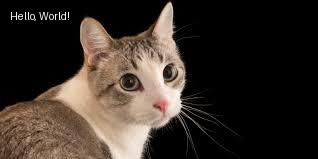
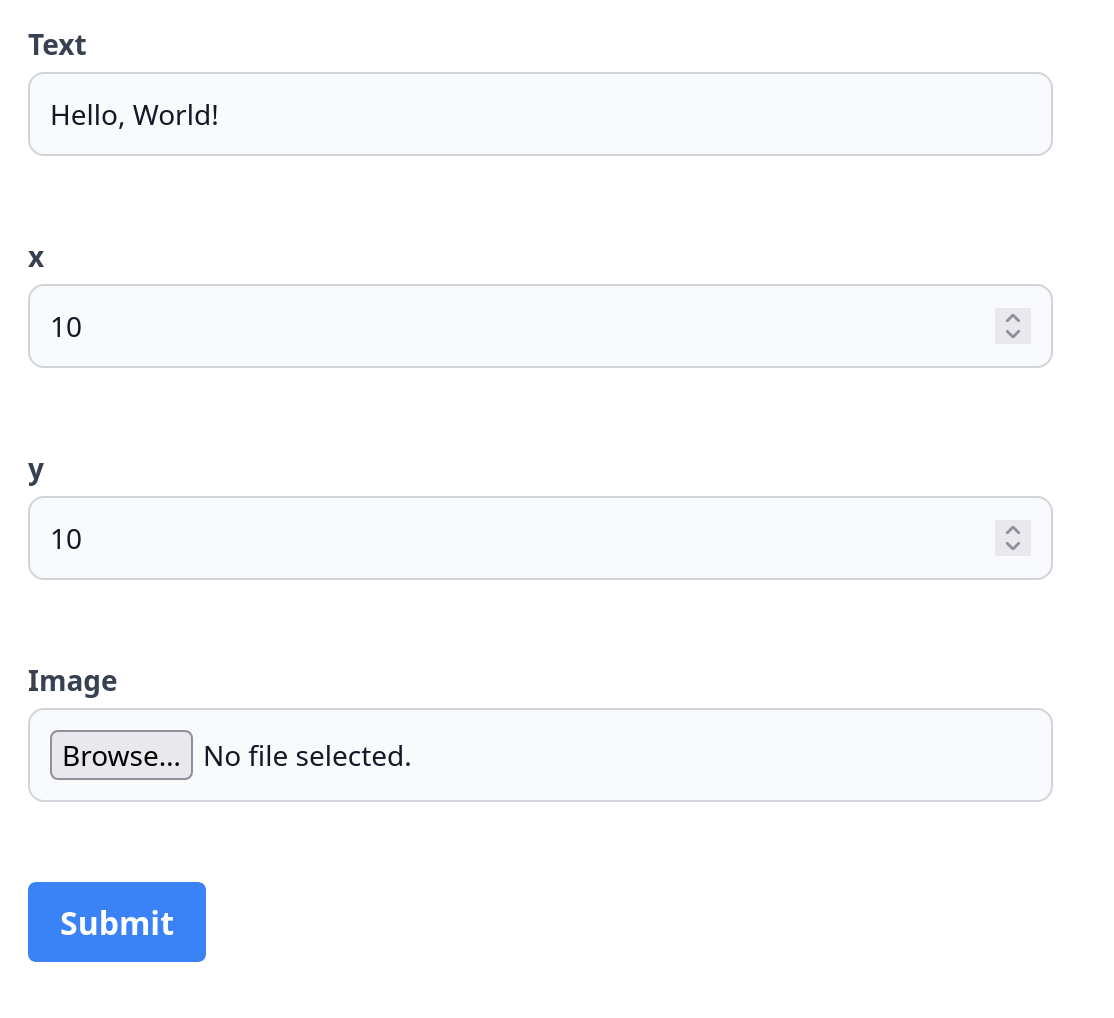

In [2]:
from bspump.jupyter import *
from bspump.http.web.server import *

We start with an example event so that we have something to play with.


In [3]:
event = {
    "form": {"textfile": "text"}
}

Then we define a simple web form to get the File we want to upload

In [4]:
auto_pipeline(
    source=lambda app, pipeline: WebFormSource(app, pipeline, route="/", fields=[
        TextField("textfield", display="Hello"),
        FileField("textfile", display="Text")
    ]),
    sink=lambda app, pipeline: WebSink(app, pipeline)
)

Pipeline section
----------------

Everything after this is rerun every time an event comes in. At run time, the `event` variable is automatically set with the value of the event that comes from the source.

We can do whatever transformations we please, and then, by setting `event` at the end of the notebook, the value of `event` will automatically be sent to the sink.

In [5]:
# open file
byte_object = event["form"]["textfile"].read()
# decode it
text = byte_object.decode('utf-8')

# respond with concatenated text
event["response"] = event["form"]["textfield"] + text
event["content_type"] = "text/plain"